# Sample Question 1
**Task** - To build a convolutional neural network (CNN) to classify images from the CIFAR-10 dataset

1. Preprocessing Images : Try to enhance the quality of the images using image enhancement techniques
1. Training & Testing : The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class. Divide the dataset into training, validation, and test sets. Implement data augmentation to improve model performance.
1. Evaluation: Infer the role of preprocessing on these images. Report accuracy on the test set with and without preprocessing. Also, provide confusion matrices to understand misclassifications.


### Links
- [Preprocessing](https://medium.com/@rhythm10/image-preprocessing-for-cifar-10-dataset-f2b5cdb221bb)
- [EDA](https://medium.com/@vangaripallavi27/exploratory-data-analysis-on-cifar-10-dataset-using-python-d5f1b0d6bcdc)
- [PIL ImageEnhahce](https://www.geeksforgeeks.org/image-enhancement-in-pil/)
- [OpenCV Image Enhancement (Histogram Equilization and stuff)](https://towardsdatascience.com/image-enhancement-techniques-using-opencv-and-python-9191d5c30d45)
- [Image Data Generation / Augmentation](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/)
- [Pipeline with Augmentation](https://www.kaggle.com/code/faressayah/cifar-10-images-classification-using-cnns-88)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical


In [2]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Data Exploration

In [5]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [6]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


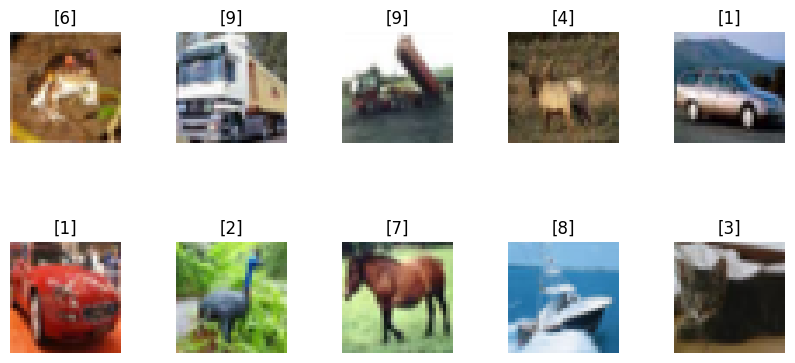

In [7]:
# Sample Images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(x_train[i])
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

# Preprocessing the images

In [8]:
# Normalize pixel values to be between 0 and 1
X_train = x_train.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0

In [9]:
# One hot encoding for the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Image Enhancement

In [10]:
from PIL import Image
import cv2
from matplotlib import cm # Colour Map

from PIL import ImageEnhance, ImageFilter

In [11]:
X_train[0].shape

(32, 32, 3)

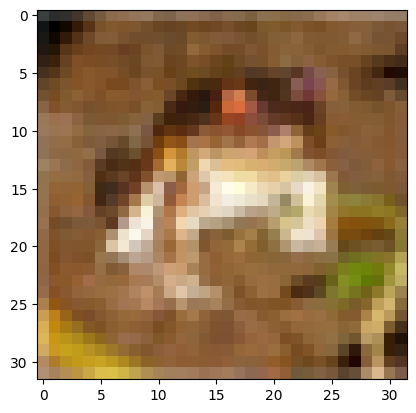

In [12]:
img = Image.fromarray(np.uint8(X_train[0] * 255))

plt.imshow(img)
plt.show()


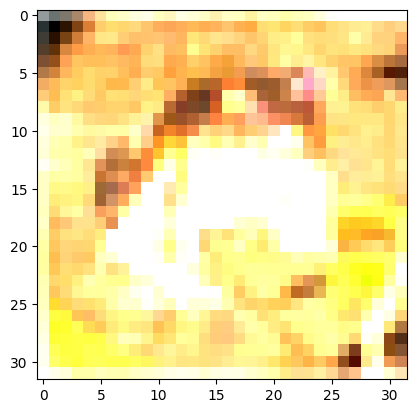

In [13]:
curr_bri = ImageEnhance.Brightness(img) 
new_bri = 2.5

img_brightened = curr_bri.enhance(new_bri) 


# img_brightened.show()

plt.imshow(img_brightened)
plt.show()


In [14]:
def enhance_images(X):
    enhanced_images = []
    for img in X:
        img_pil = Image.fromarray((img * 255).astype(np.uint8))

        # Apply the sharpen filter
        img_enhanced = img_pil.filter(ImageFilter.SHARPEN)

        img_array = np.array(img_enhanced) / 255 # Convert and Normalise
        enhanced_images.append(img_array)
    return np.array(enhanced_images)

# Apply the function to the training images
X_train_enhanced = enhance_images(X_train)


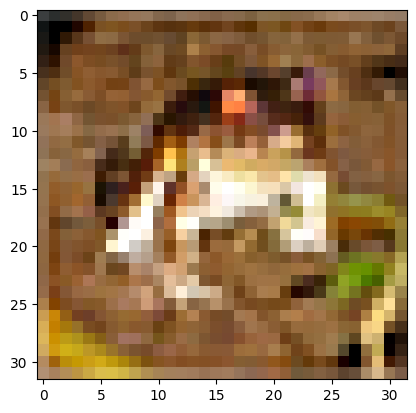

In [15]:
plt.imshow(X_train_enhanced[0])
plt.show()

In [16]:
X_train_enhanced[0].shape

(32, 32, 3)

# Model Training

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
y_train.shape

(50000, 10)

In [19]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

datagen.fit(X_train)

X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    augmented_image = datagen.random_transform(X_train[i])

    X_train_augmented.append(augmented_image)
    y_train_augmented.append(y_train[i])

# Convert the lists to numpy arrays
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


In [20]:
X_train_augmented.shape

(50000, 32, 32, 3)

In [21]:
y_train_augmented.shape

(50000, 10)

In [22]:
X_train_combined = np.concatenate((X_train, X_train_augmented), axis=0)
y_train_combined = np.concatenate((y_train, y_train_augmented), axis=0)

In [23]:
X_train_combined.shape

(100000, 32, 32, 3)

In [24]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

/Users/daver/Desktop/College Work/IVP_Model_Lab_Study/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [28]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [30]:
history = model.fit(X_train_combined, y_train_combined, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 157s 50ms/step - accuracy: 0.6210 - loss: 1.0796 - precision: 0.7634 - recall: 0.4819 - val_accuracy: 0.7133 - val_loss: 0.8142 - val_precision: 0.8099 - val_recall: 0.6197
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 160s 51ms/step - accuracy: 0.7085 - loss: 0.8466 - precision: 0.8117 - recall: 0.6103 - val_accuracy: 0.7794 - val_loss: 0.6527 - val_precision: 0.8461 - val_recall: 0.7182
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 153s 49ms/step - accuracy: 0.7576 - loss: 0.7161 - precision: 0.8402 - recall: 0.6787 - val_accuracy: 0.7900 - val_loss: 0.6318 - val_precision: 0.8496 - val_recall: 0.7394
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 156s 50ms/step - accuracy: 0.7859 - loss: 0.6325 - precision: 0.8562 - recall: 0.7196 - val_accuracy: 0.7824 - val_loss: 0.6564 - val_precision: 0.8460 - val_recall: 0.7224
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 157s 50ms/step - accuracy: 0.8037 - loss: 0.5734 - precision: 0.8673 - recall: 0.7464 - val_accura

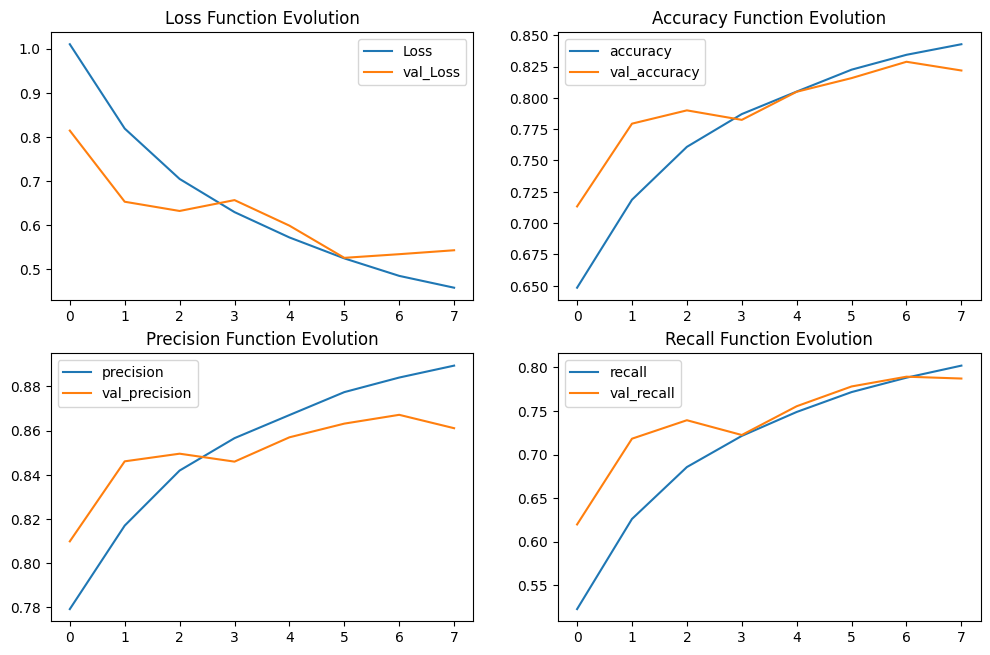

In [31]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [34]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8421 - loss: 0.5035 - precision: 0.8799 - recall: 0.8080
Test Accuracy : 83.33%
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


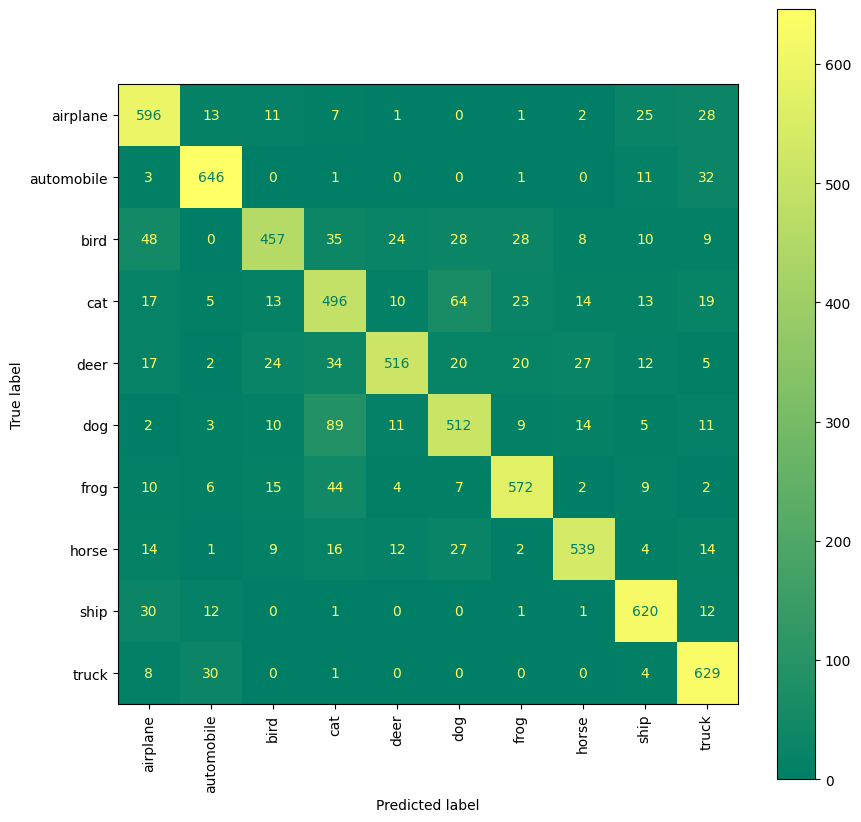

In [36]:
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

# DenseNet

In [37]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [38]:
history = model.fit(X_train_combined, y_train_combined, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 511s 157ms/step - accuracy: 0.5561 - loss: 1.3193 - val_accuracy: 0.3433 - val_loss: 6.6227
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 528s 169ms/step - accuracy: 0.6992 - loss: 0.9103 - val_accuracy: 0.6888 - val_loss: 1.1923


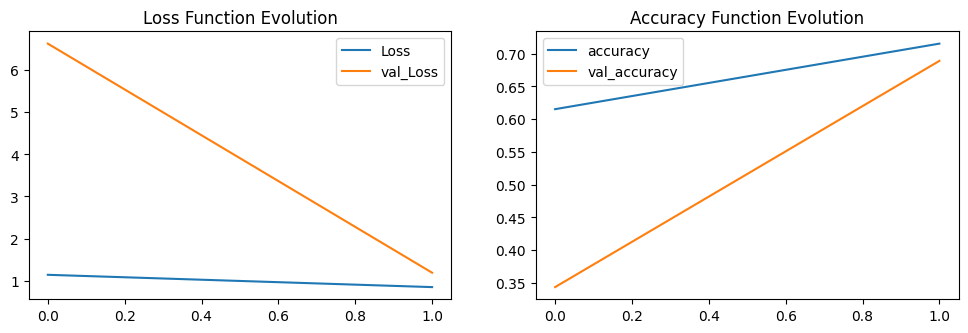

In [40]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# plt.subplot(4, 2, 3)
# plt.plot(history.history['precision'], label='precision')
# plt.plot(history.history['val_precision'], label='val_precision')
# plt.title('Precision Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 4)
# plt.plot(history.history['recall'], label='recall')
# plt.plot(history.history['val_recall'], label='val_recall')
# plt.title('Recall Function Evolution')
# plt.legend()